# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics


In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

In [2]:
path = "../../NotebooksProfessor/datasets/iris/iris.csv"


colnames = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Flower_Name']

# Load the dataset
dataset = pd.read_csv(path, header=None, names=colnames)

In [3]:
df  =  pd.DataFrame(dataset)

# Data frame printed
print (df)
# Number of observations and variables
df.shape

     Sepal_length  Sepal_width  Petal_length  Petal_width     Flower_Name
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


(150, 5)

In [4]:
# Drop rows with NaN values if existing
df.dropna()

# Print the new shape
print(df.shape)

(150, 5)


In [5]:
petal_info_and_typeflower = ['Sepal_length','Sepal_width', 'Petal_length','Petal_width' ]
filtered_df = df[petal_info_and_typeflower]
print(filtered_df)

     Sepal_length  Sepal_width  Petal_length  Petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


## Petal Features Scatter Plots

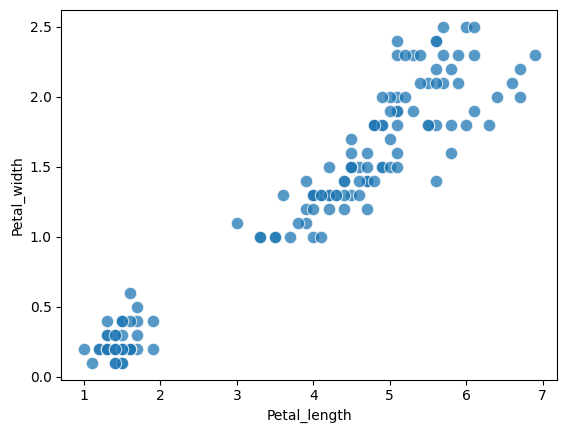

In [6]:
sns.scatterplot(data=df, x="Petal_length", y="Petal_width", s=80, alpha=0.75)
plt.show()

## Sepal Features Scatter Plotts

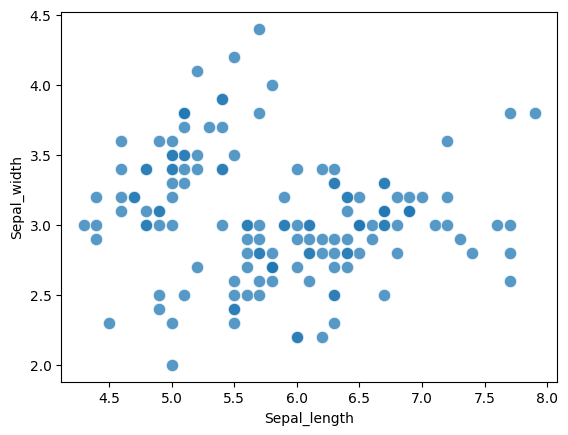

In [7]:
sns.scatterplot(data=df, x="Sepal_length", y="Sepal_width", s=80, alpha=0.75)
plt.show()

## All Scatter Plots from 4 features

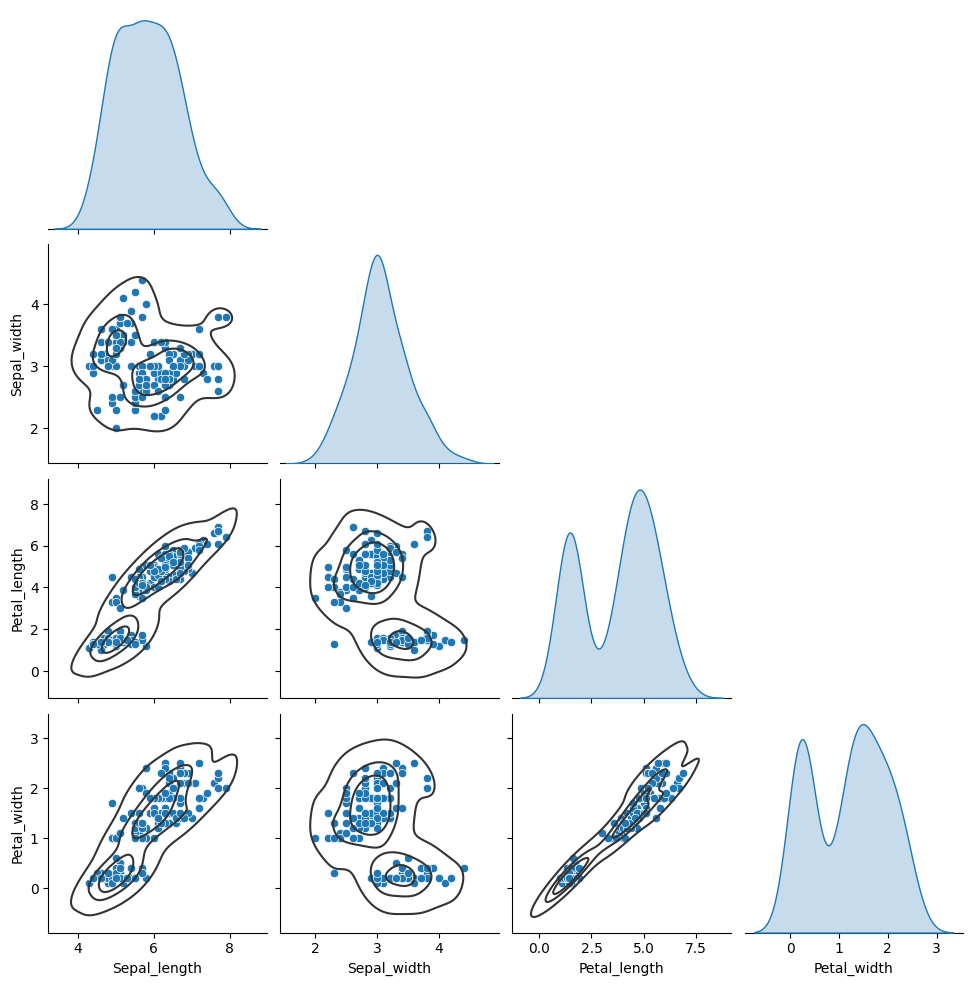

In [8]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(filtered_df, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

# 1. Clustering of four features

Since scatter plots are designed for visualizing data in two dimensions, attempting to plot a clustering analysis with four features in a single graph becomes challenging. Visualizing clustering in a four-dimensional space directly is impractical. Therefore, we employ a strategy of dividing the features into petal and sepal characteristics. This approach allows us to conduct clustering in a reduced two-dimensional space, facilitating visualization through a scatter plot of clusters.

In [9]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated_sepal = km.fit_predict(filtered_df[['Sepal_length', 'Sepal_width']])
#yestimated = km.fit_predict(df[['x1','x2']] )
#yestimated = km.fit_predict(df[['x1','x3']] )

# Print estimated cluster of each point in the dataset
yestimated_sepal

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [10]:
filtered_df.loc[:, 'yestimated'] = yestimated_sepal

filtered_df

,Sepal_length,Sepal_width,Petal_length,Petal_width,yestimated
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
# Print the Labels/Names of the existing clusters
filtered_df.yestimated.unique()

array([1, 2, 0], dtype=int32)

In [13]:
# Cluster centroides
km.cluster_centers_


array([[5.8       , 2.7       ],
       [5.00392157, 3.40980392],
       [6.82391304, 3.07826087]])

In [14]:
# Sum of squared error (sse) of the final model
km.inertia_

37.08627024722933

In [15]:
# The number of iterations required to converge
km.n_iter_

5

In [16]:
# Get a dataframe with the data of each clsuter
df0 = filtered_df[filtered_df.yestimated==0]
df1 = filtered_df[filtered_df.yestimated==1]
df2 = filtered_df[filtered_df.yestimated==2]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 53
Number of points in clusters 1: 51
Number of points in clusters 02: 46
Total Number of points in the clusters: 150


# 2. Clustering for Sepal Features

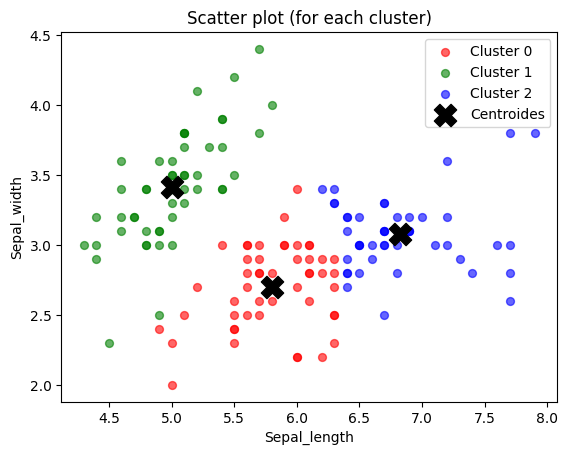

In [17]:
# Get a dataframe with the data of each clsuter
df1 = filtered_df[filtered_df.yestimated==0]
df2 = filtered_df[filtered_df.yestimated==1]
df3 = filtered_df[filtered_df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.Sepal_length, df1.Sepal_width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.6)
plt.scatter(df2.Sepal_length, df2.Sepal_width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.6)
plt.scatter(df3.Sepal_length, df3.Sepal_width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.6)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='X', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.legend()
plt.show()

In [18]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated_petal = km.fit_predict(filtered_df[['Petal_length', 'Petal_width']])
#yestimated = km.fit_predict(df[['x1','x2']] )
#yestimated = km.fit_predict(df[['x1','x3']] )

# Print estimated cluster of each point in the dataset
yestimated_petal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [19]:
# Add a new column to the dataset with the cluster information
filtered_df.loc[:, 'yestimated'] = yestimated_sepal

filtered_df

,Sepal_length,Sepal_width,Petal_length,Petal_width,yestimated
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
# Get a dataframe with the data of each clsuter
df0 = filtered_df[filtered_df.yestimated==0]
df1 = filtered_df[filtered_df.yestimated==1]
df2 = filtered_df[filtered_df.yestimated==2]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 53
Number of points in clusters 1: 51
Number of points in clusters 02: 46
Total Number of points in the clusters: 150


# 3. Clustering for Petal Features

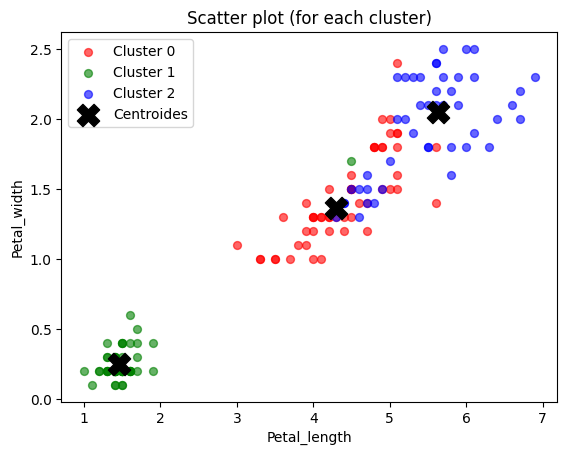

In [21]:
# Get a dataframe with the data of each clsuter
df1 = filtered_df[filtered_df.yestimated==0]
df2 = filtered_df[filtered_df.yestimated==1]
df3 = filtered_df[filtered_df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.Petal_length, df1.Petal_width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.6)
plt.scatter(df2.Petal_length, df2.Petal_width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.6)
plt.scatter(df3.Petal_length, df3.Petal_width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.6)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='X', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.legend()
plt.show()

# 4. Better grouping based of Elbow Plots

In [22]:
# Intialize a list to hold sum of squared error (sse)
sse_petals = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['Petal_length','Petal_width']])
    # Save sse for each k
    sse_petals.append(km.inertia_)

sse_sepals = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['Sepal_length','Sepal_width']])
    # Save sse for each k
    sse_sepals.append(km.inertia_)



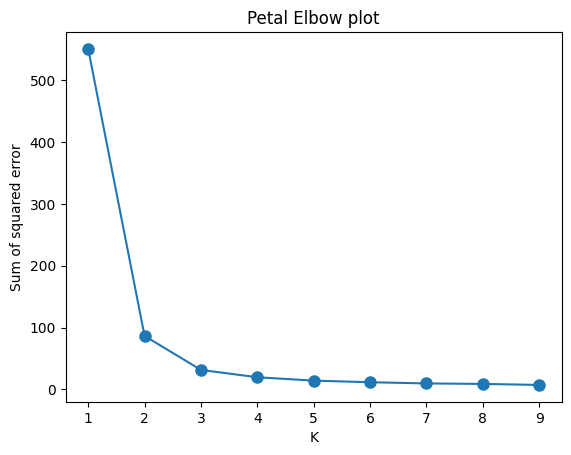

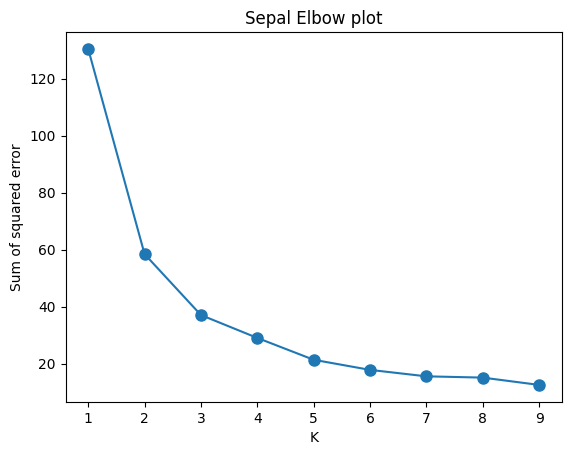

In [23]:
# Plot sse versus k
plt.plot(k_rng,sse_petals, 'o-', markersize=8)

plt.title('Petal Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


# Plot sse versus k
plt.plot(k_rng,sse_sepals, 'o-', markersize=8)

plt.title('Sepal Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()




It appears that we achieve more cohesive groupings with a superior fit in the Sepal elbow plot, as evidenced by the inflection point at k = 2, where the sum of squared errors (SSE) is approximately 60. This compares favorably to the Petal Elbow plot, where we observe a similar inflection point at k = 2, but with a higher SSE of about 95. Showing how that even though we have the same number of clusters the SSE is lower in the **Sepal_length** and **Sepal_width** features.